# Phase 3 Data Science Report

## Requirements

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [280]:
# read in all the batches
batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [281]:
# convert the batches to dataframes
df1 = pd.DataFrame(batch1[b'data'])
df2 = pd.DataFrame(batch2[b'data'])
df3 = pd.DataFrame(batch3[b'data'])
df4 = pd.DataFrame(batch4[b'data'])
df5 = pd.DataFrame(batch5[b'data'])
test_df = pd.DataFrame(test_batch[b'data'])

In [285]:
# print the shape of each dataframe
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(test_df.shape)

(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)
(10000, 3072)


In [286]:
df1.iloc[0].shape

(3072,)

In [287]:
# # reshape the dataframes with labels so that the channels are in the correct place
# df1_labels = df1_labels.values.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [288]:
# reshape each dataframe to 32x32x3
df1 = df1.values.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
df2 = df2.values.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
df3 = df3.values.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
df4 = df4.values.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
df5 = df5.values.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
test_df = test_df.values.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")



In [295]:
# make a new dataframe with df1 and its labels
df1_labels = pd.DataFrame(batch1[b'labels'])
df1_labels['label'] = batch1[b'labels']
df1_labels['image'] = df1


6


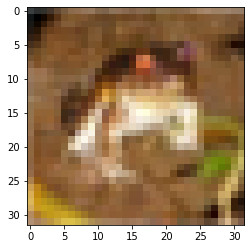

In [299]:
# render the first image from df1
plt.imshow(df1[0])
# print the label for the first image
print(df1_labels['label'][0])



In [311]:
# make a dictionary with the key being the label of the image and the value being the index of the image from df1
label_dict = {}
for i in range(len(df1_labels)):
    if df1_labels['label'][i] not in label_dict:
        label_dict[df1_labels['label'][i]] = [i]
    else:
        label_dict[df1_labels['label'][i]].append(i)



In [314]:
# sort dictionary by key
label_dict = dict(sorted(label_dict.items()))


Label:  0


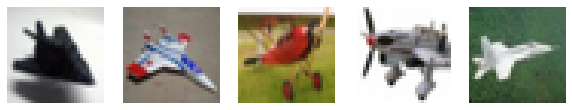

Label:  1


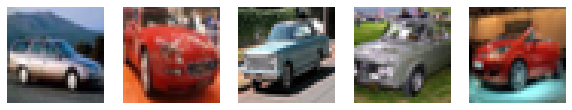

Label:  2


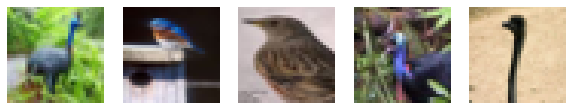

Label:  3


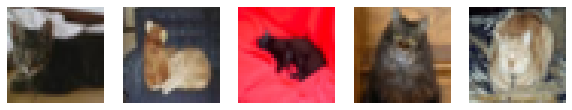

Label:  4


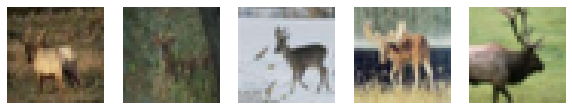

Label:  5


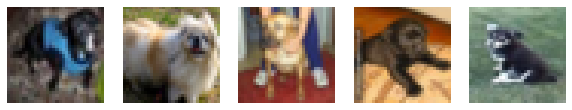

Label:  6


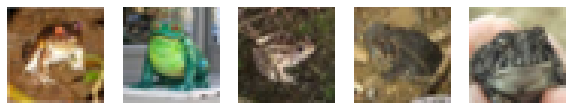

Label:  7


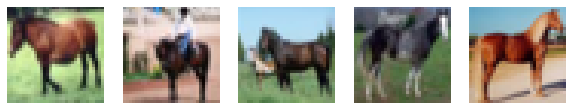

Label:  8


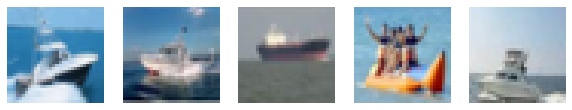

Label:  9


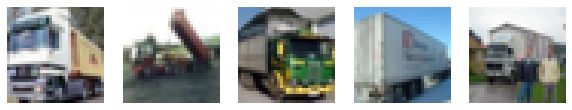

In [321]:
# render the images for each key in the dictionary
for key in label_dict:
    plt.figure(figsize=(10,10))
    print("Label: ", key)
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(df1[label_dict[key][i]])
        plt.axis('off')
    plt.show()


Label 0


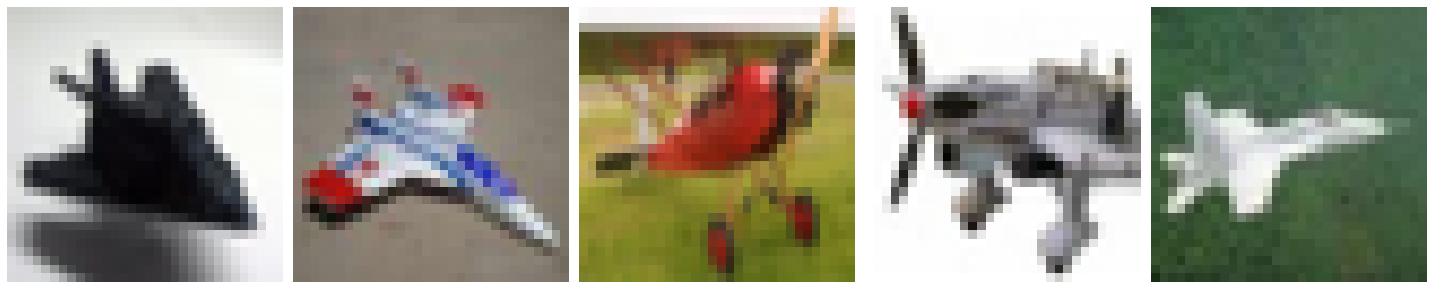

In [307]:
# render 5 images from df1 with the label 0
fig, axes = plt.subplots(1, 5, figsize=(20,20))
axes = axes.flatten()
print('Label 0')
for img, ax in zip(df1[df1_labels['label'] == 0][:5], axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

Label 0


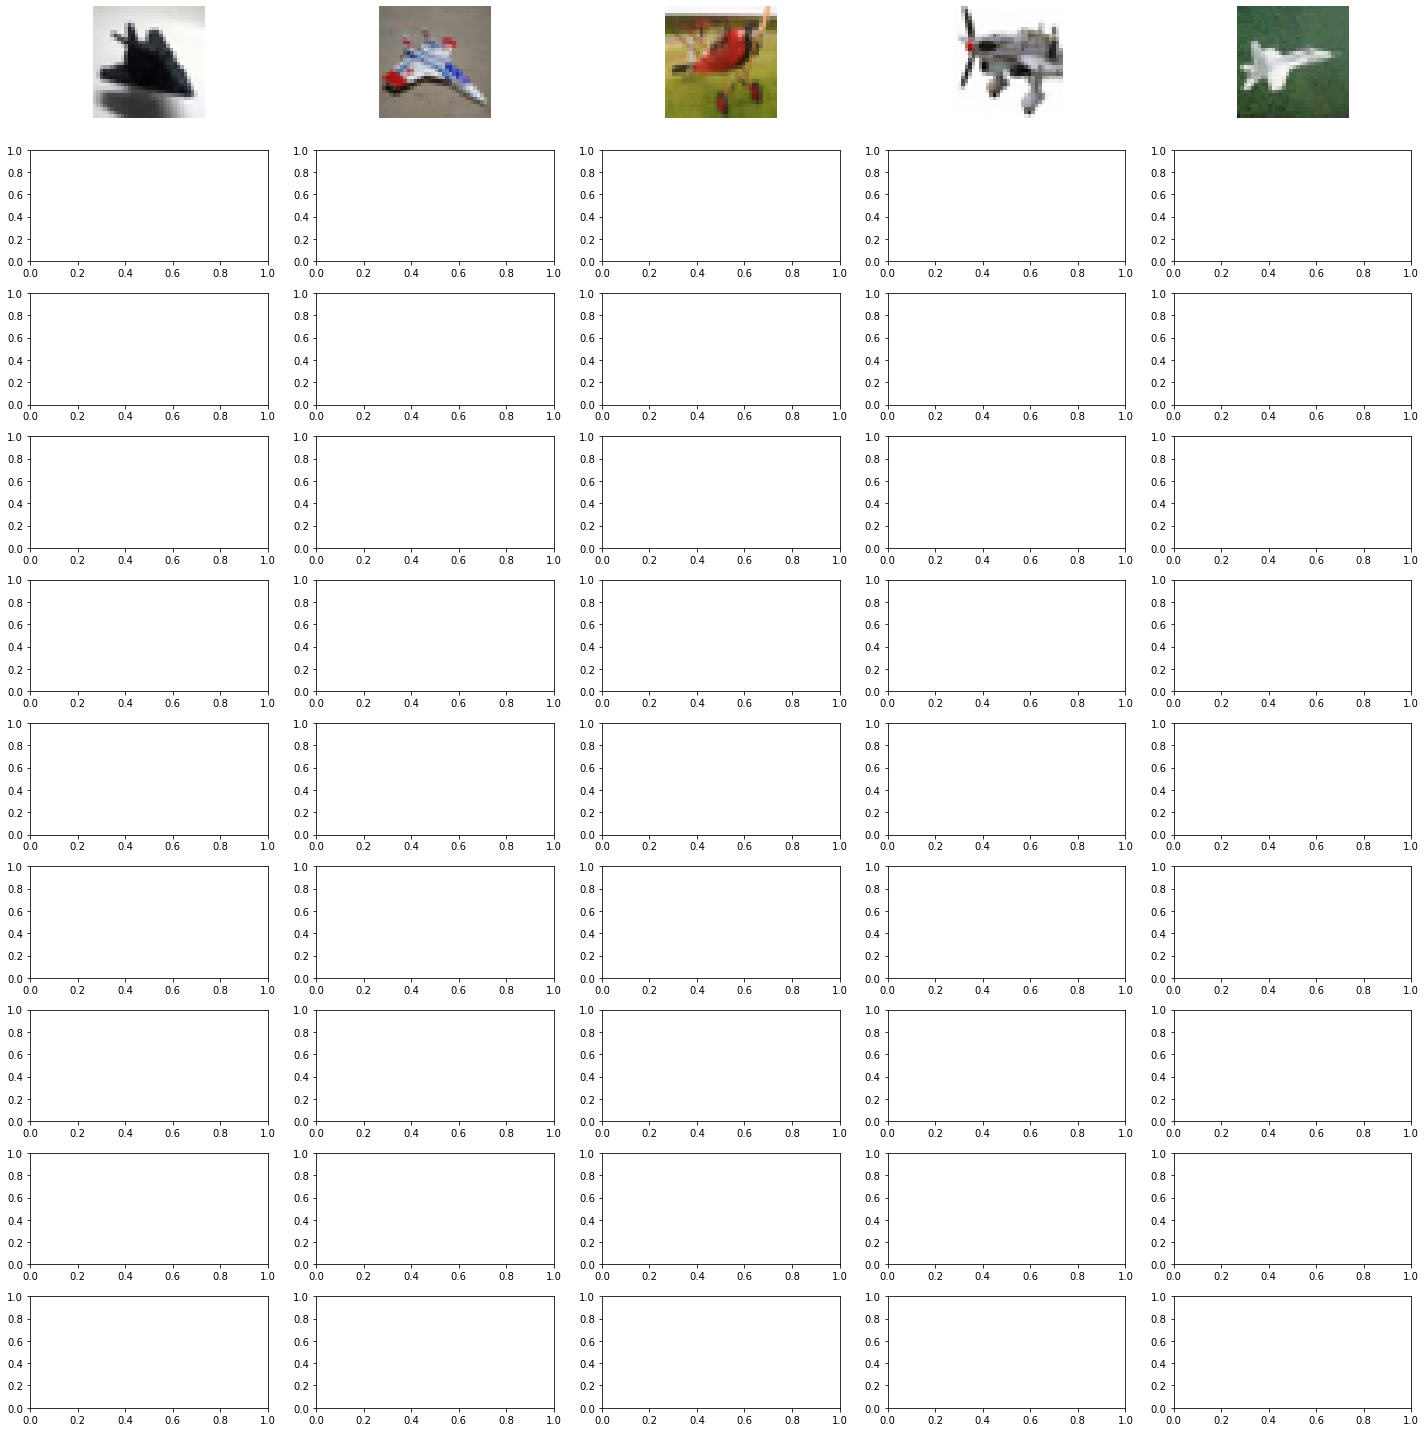

Label 1


<Figure size 432x288 with 0 Axes>

Label 2


<Figure size 432x288 with 0 Axes>

Label 3


<Figure size 432x288 with 0 Axes>

Label 4


<Figure size 432x288 with 0 Axes>

Label 5


<Figure size 432x288 with 0 Axes>

Label 6


<Figure size 432x288 with 0 Axes>

Label 7


<Figure size 432x288 with 0 Axes>

Label 8


<Figure size 432x288 with 0 Axes>

Label 9


<Figure size 432x288 with 0 Axes>

In [305]:
# render 5 images from each label



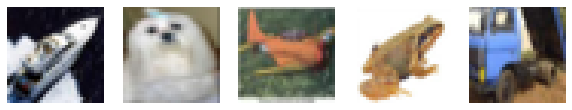

In [291]:
# render 5 images from dataframe 3
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(df3[i])
    plt.axis('off')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

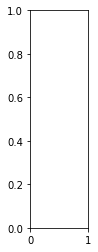

In [292]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(test_df.iloc[i].values.reshape(32,32,3))
    plt.axis('off')
plt.show()

# Introduction

In [ ]:
print("hi")

# Model Process

# Model Performance

# Conclusion

# References

1. [Learning Multiple Layers of Features from Tiny Images](http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.